# Explanatory notes on Wu et al 2006
Making concrete some of the asides; adding explanation for formulas.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore
from skimage import filters

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# What do we mean that there are correlations in natural images?

In [4]:
# Load images
fdir = '/unrshare/LESCROARTLAB/stimuli/NaturalMovies/val001/'
ims = np.array([plt.imread(fdir + 'im%07d.png'% i).T for i in range(1, 3601, 36)]).T
print(ims.shape)

(512, 512, 3, 100)


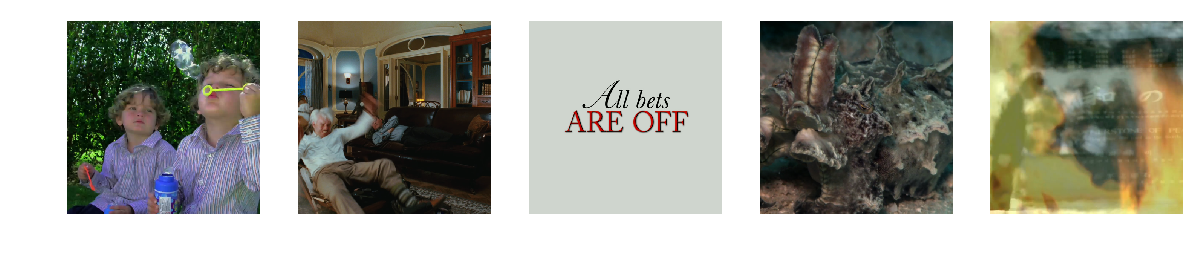

In [5]:
# Show some of the images
fig, axs = plt.subplots(1, 5, figsize=(10,2))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(ims[...,i*10]);
    ax.set_axis_off()

# Show correlations between pixels in an image

In [8]:
from ipywidgets import widgets, interactive

def corr_im_plot(ix, iy):
    rgb1, rgb2 = 0, 0
    pix_a = ims[iy, ix, rgb1, :] # third index of `0` specifies R of RGB (3rd axis of array)
    # Find the correlation between two pixels
    all_other_rpixels = ims[:,:,rgb2,:].reshape(512*512, -1).T
    r = (zscore(pix_a[:, np.newaxis], axis=0) * zscore(all_other_rpixels, axis=0)).mean(0).reshape(512,512)
    r_im = (r + 1)/2
    rs_im = filters.gaussian(r_im, sigma=10)
    rs = rs_im * 2 -1
    fig, ax = plt.subplots(num=33, figsize=(5, 5))
    #for r, ax in zip([r_r, r_g, r_b], axs.flatten()):
    ax.imshow(r, vmin=-1, vmax=1, cmap='RdBu_r')
    ax.contour(np.clip(rs, 0, 1), [0.75, 0.85], cmap='gray')
    ax.plot(ix, iy, 'o', color=(0.9, 0.85, 0))
    #plt.show()

ix = widgets.IntSlider(
    value=256,
    min=0,
    max=511,
    step=3,
    description='$X$',
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='d',)

iy = widgets.IntSlider(
    value=256,
    min=0,
    max=511,
    step=1,
    description='$Y$',
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='d',)

interactive_plot = interactive(corr_im_plot, ix=ix, iy=iy,
                              continuous_update=False)
interactive_plot

interactive(children=(IntSlider(value=256, description='$X$', max=511, step=3), IntSlider(value=256, description='$Y$', max=511), Output()), _dom_classes=('widget-interact',))

In [7]:
interactive_plot.close()